In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [15]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [16]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = Input(shape=(28, 28, 1))

In [17]:
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28 * 28, activation='sigmoid')(decoded)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

denoised_images = autoencoder.predict(x_test_noisy)

n = 10  # Number of images to display
plt.figure(figsize=(20, 6))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3330 - val_loss: 0.2051
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1921 - val_loss: 0.1728
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1697 - val_loss: 0.1589
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1578 - val_loss: 0.1513
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1505 - val_loss: 0.1464
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1462 - val_loss: 0.1425
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1425 - val_loss: 0.1400
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1391 - val_loss: 0.1367
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1365 - val_loss: 0.1346
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1343 - val_loss: 0.1323
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1321 - val_loss: 0.1312
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

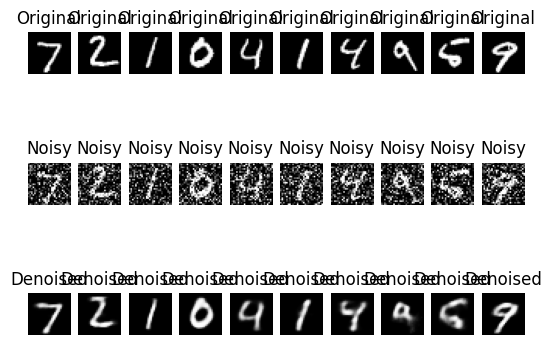

In [21]:

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")
plt.show()

### Autoencoder with Laplace Noise

In [10]:
noise_factor_laplace = 0.5
x_train_noisy_laplace = x_train + noise_factor_laplace * np.random.laplace(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy_laplace = x_test + noise_factor_laplace * np.random.laplace(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_laplace = np.clip(x_train_noisy_laplace, 0., 1.)
x_test_noisy_laplace = np.clip(x_test_noisy_laplace, 0., 1.)

input_img_laplace = Input(shape=(28, 28, 1))

In [11]:
x_laplace = Flatten()(input_img_laplace)
encoded_laplace = Dense(128, activation='relu')(x_laplace)
encoded_laplace = Dense(64, activation='relu')(encoded_laplace)
encoded_laplace = Dense(32, activation='relu')(encoded_laplace)

decoded_laplace = Dense(64, activation='relu')(encoded_laplace)
decoded_laplace = Dense(128, activation='relu')(decoded_laplace)
decoded_laplace = Dense(28 * 28, activation='sigmoid')(decoded_laplace)
decoded_laplace = Reshape((28, 28, 1))(decoded_laplace)

autoencoder_laplace = Model(input_img_laplace, decoded_laplace)
autoencoder_laplace.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder_laplace.fit(x_train_noisy_laplace, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy_laplace, x_test))

denoised_images_laplace = autoencoder_laplace.predict(x_test_noisy_laplace)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3351 - val_loss: 0.2161
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2065 - val_loss: 0.1780
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1754 - val_loss: 0.1650
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1639 - val_loss: 0.1578
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1574 - val_loss: 0.1533
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1529 - val_loss: 0.1500
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1491 - val_loss: 0.1471
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1466 - val_loss: 0.1442
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1440 - val_loss: 0.1421
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1415 - val_loss: 0.1407
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1398 - val_loss: 0.1390
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

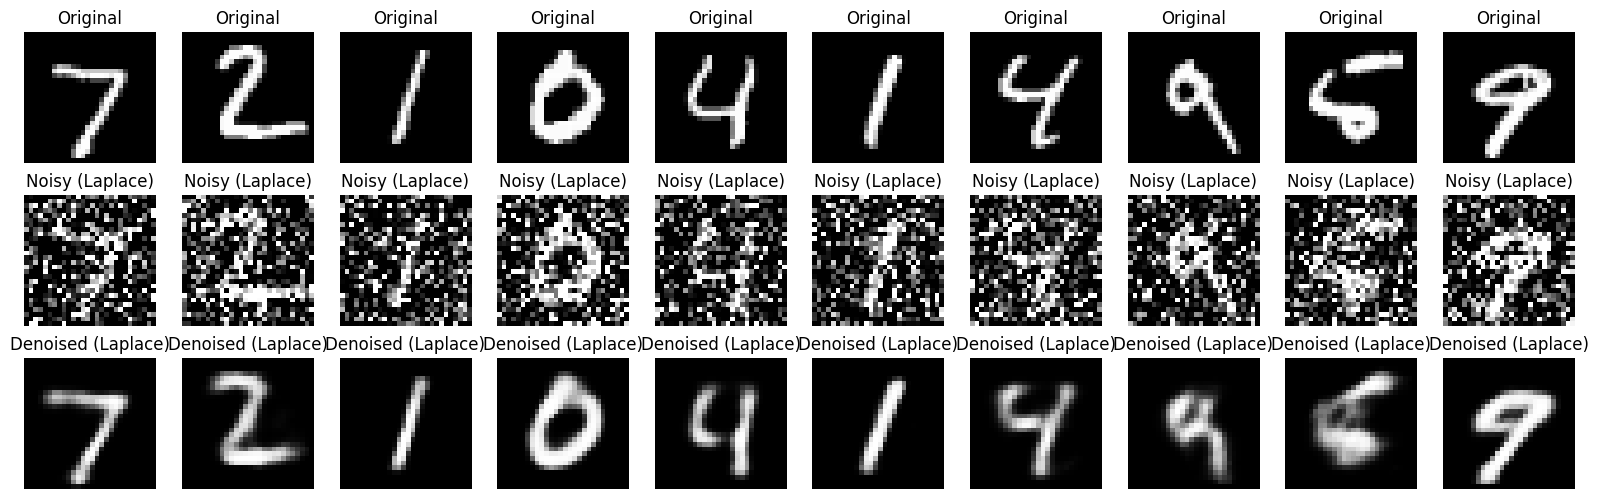

In [12]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_laplace[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy (Laplace)")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images_laplace[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised (Laplace)")
    plt.axis("off")
plt.show()